# P1課題補足資料のRC回路のグラフ例

### 2020/5/5 小関泰之

- P1課題補足資料に従い、LTspiceを用いてLPFの周波数特性とステップ応答を計算したら、理論曲線と比較してみましょう。
- グラフ化のソフトとしてはMATLAB, Excel, gnuplot, sma4winなど様々なものがありますが、ここでは、Python + matplotlib + Jupyter Notebookを使ってグラフ化を行った例を示します。
- Python 3, numpy, pandas, matplotlib, Jupyter Notebookはpip3でインストールできます。
- 動作確認はmacOS10.15.4, Python 3.7, pandas 1.0.3, numpy 1.18.2, matplotlib 3.2.1, Jupyter Notebook 6.0.1で行いました。
- 補足資料で計算する時定数0.1 ms (カットオフ周波数1.6 kHz)のLPFで得られるデータを表示することを前提としています。
 - 周波数特性データ名は 01_lpf_freq.txt としています。周波数範囲は10 Hz ~ 10 kHzです。
 - ステップ応答データ名は 02_lpf_step.txt としています。波形の時間範囲は0 ms ~ 2 msで、時間1 msから立ち上がります。
- DPI (dots per inch)を300に設定しています。
- 画像をPNGファイルで保存しています。WordやLaTeXに貼り付けることができます。
- Shift + Enterで１ブロックずつ実行することができます。

In [1]:
# おまじない
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#LPFの理論特性の計算 （P3実験で学ぶ知識を使っています。）
fc = 10000 / 2 / np.pi #カットオフ周波数: 1.6 kHz
fb = 300 # BPFの場合の帯域: 300 Hz

f = np.logspace(1,5,1000) #対数軸での周波数配列を10^1 ~ 10^5まで準備。
s = 1j * f / fc         #LPFの場合。実験テキストp. 50, 表P3.1を参照。
#s = 1 / (1j * f / fc)  #HPFにする場合はコメントアウトを外す
#s = 1j * fc / fb * (f / fc - fc / f)  #BPFにする場合はコメントアウトを外す
#s = 1 / (1j * fc / fb * (f / fc - fc / f)) #BEFにする場合はコメントアウトを外す

F = 1 / (s + 1) # 1次フィルタ
#F = 1 / (s*s*s + 2*s*s + 2*s + 1) # 3次Butterworthフィルタ

#F = 1 / (1 + 2j * np.pi * f * 1e-4) # P1までの知識で、sを使わずにLPFの周波数特性を記述するとこのようになります。
#                                    # RC = 1000 x 0.1u = 1e-4。

amp = 20*np.log10(np.absolute(F))
phase = np.angle(F) * 180 / np.pi

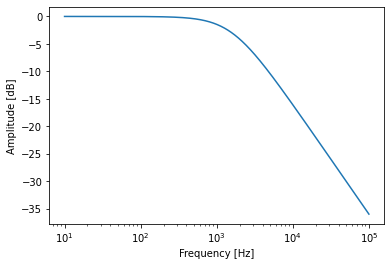

In [3]:
#振幅特性のプロット
plt.plot(f, amp)
plt.xscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.show()

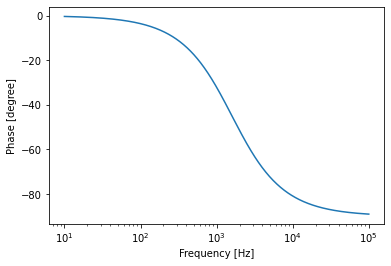

In [4]:
#位相特性のプロット
plt.plot(f, phase)
plt.xscale("log")
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [degree]')
plt.show()

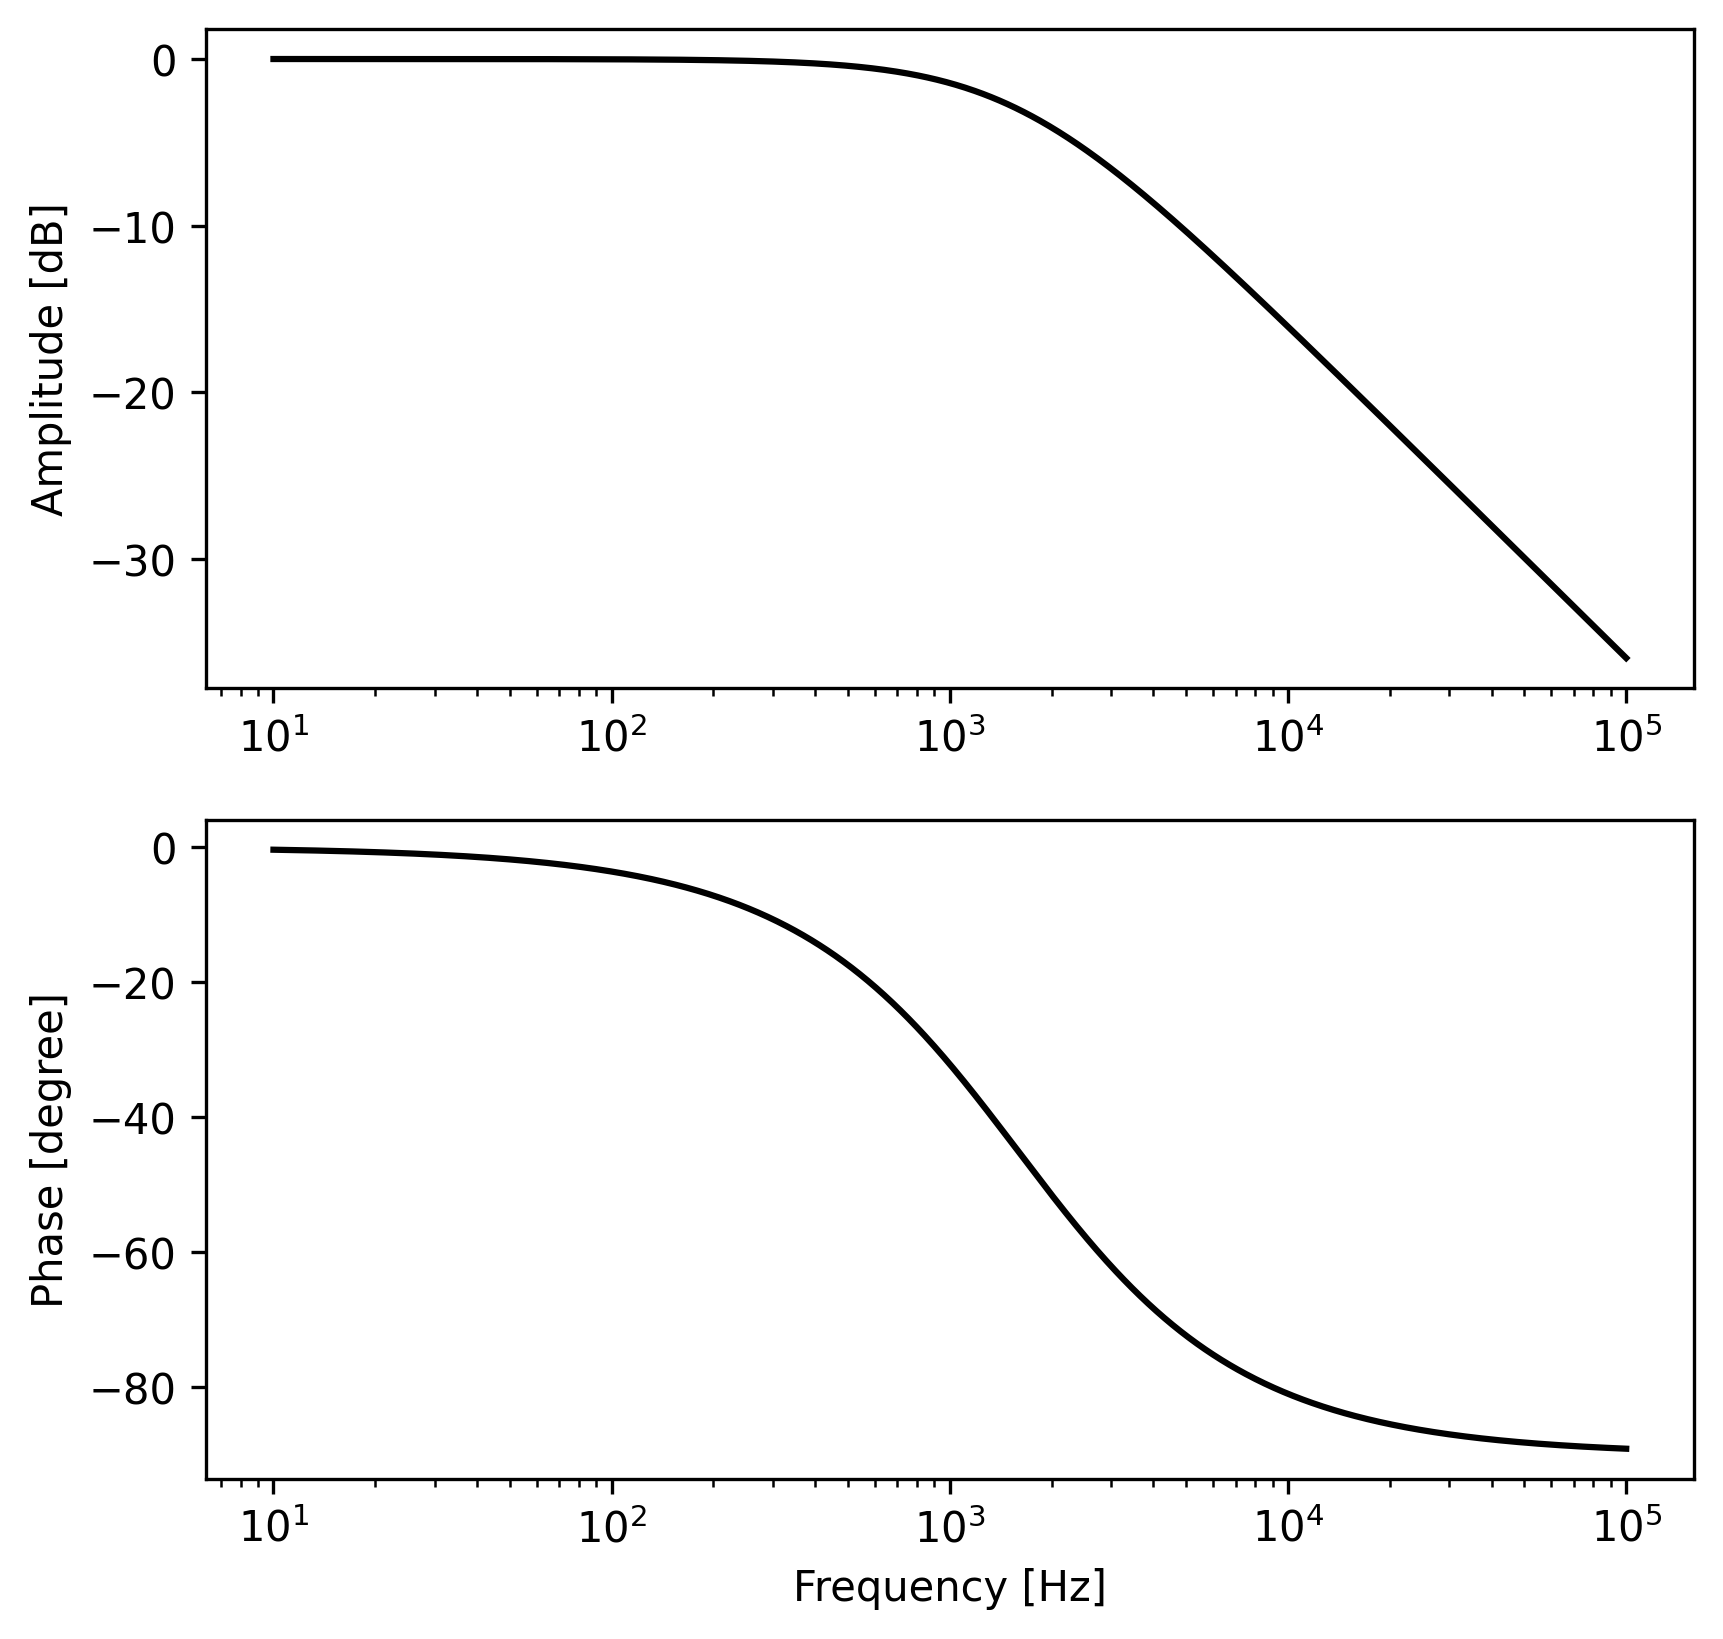

In [5]:
#振幅・位相の同時プロット（縦に並べる場合）

fig = plt.figure(figsize=(6.4,6.4), dpi=300)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

#振幅のプロット
ax1.plot(f, amp, color='black')
ax1.set_ylabel("Amplitude [dB]")
ax1.set_xscale("log")

#位相のプロット
ax2.plot(f, phase, color='black')
ax2.set_xlabel("Frequency [Hz]")
ax2.set_ylabel("Phase [degree]")
ax2.set_xscale("log")

#グラフ画像保存
plt.savefig('01_lpf_freq_theory.png')
plt.show()

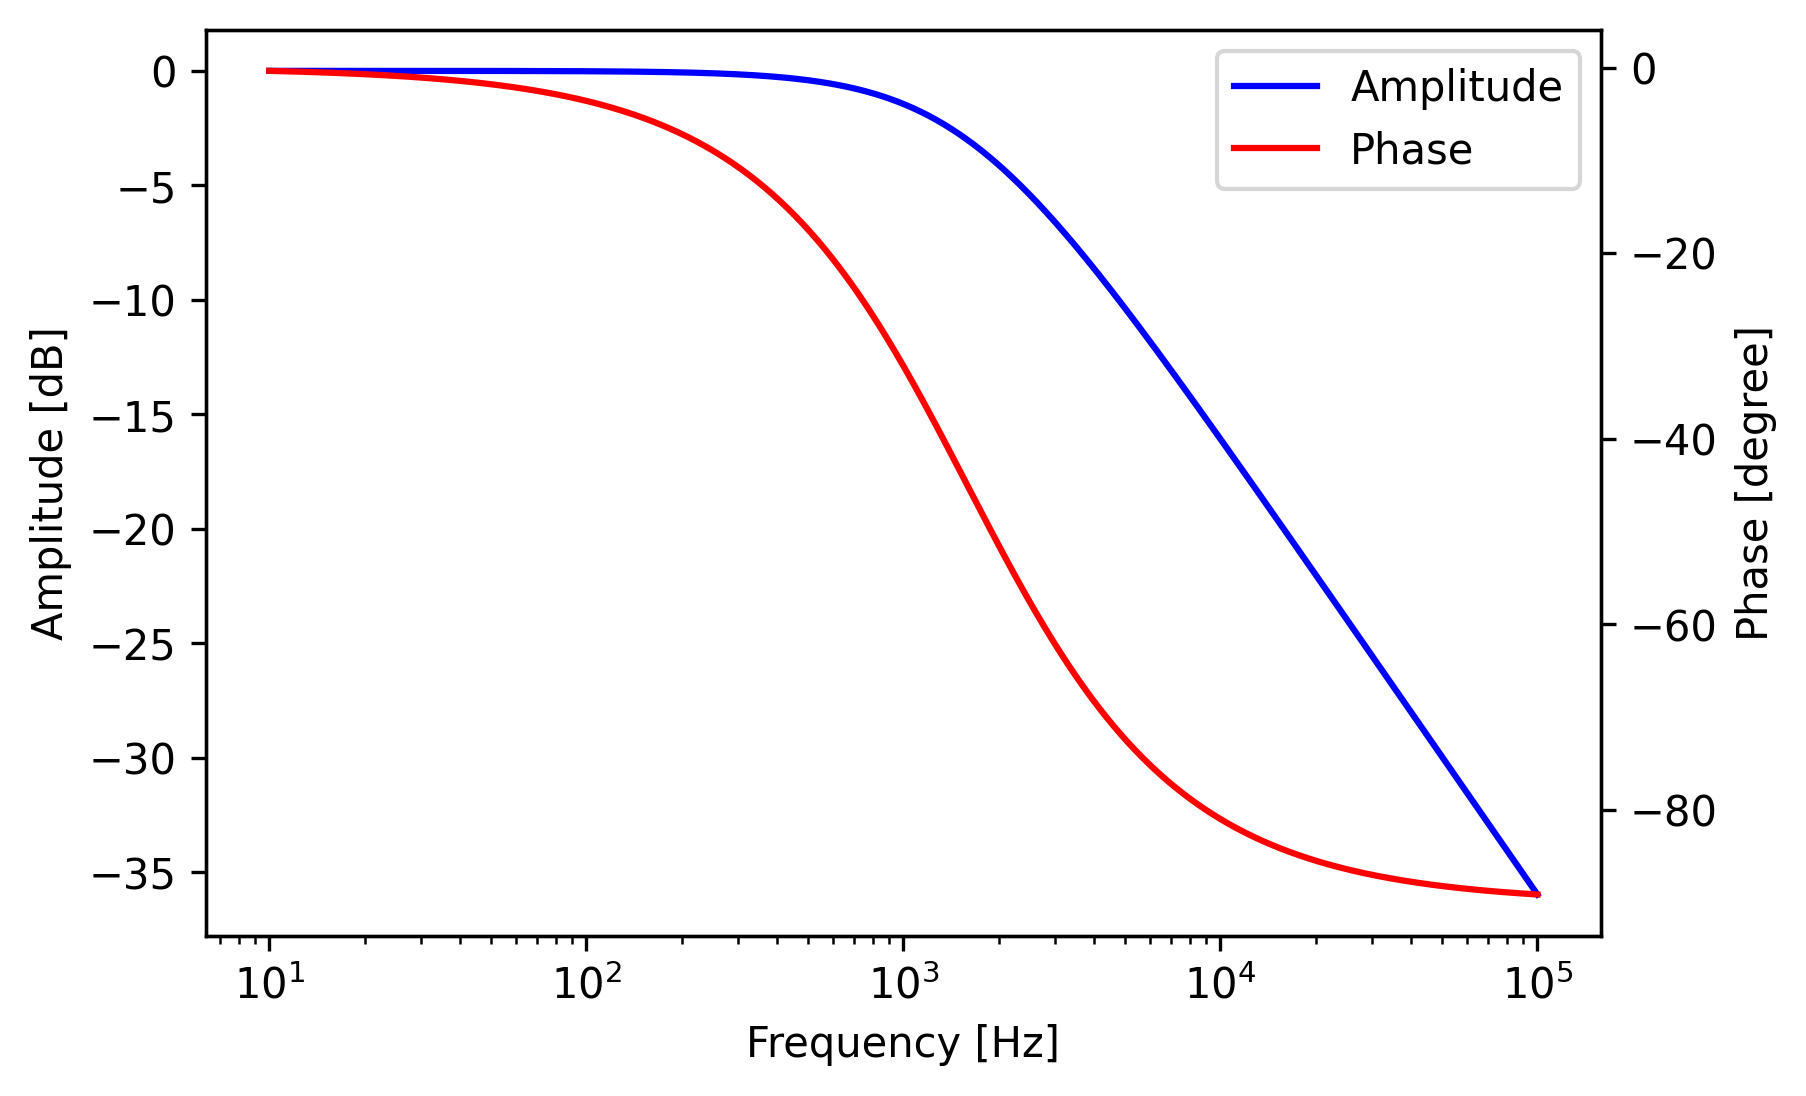

In [6]:
#振幅・位相の同時プロット（1つのグラフに描く場合。あまり一般的ではない）

fig = plt.figure(dpi=300)
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

#振幅のプロット
ax1.plot(f, amp, color="blue", label = 'Amplitude')
ax1.set_xlabel("Frequency [Hz]")
ax1.set_ylabel("Amplitude [dB]")

#位相のプロット
ax2.plot(f, phase, color="red", label = 'Phase')
ax2.set_ylabel("Phase [degree]")
plt.xscale("log")

#凡例の表示
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

#グラフ画像保存
plt.savefig('01_lpf_freq_theory2.png')
plt.show()

In [7]:
# 周波数特性データのデータフレームdfへの読み込み。1列目：周波数、2列目：実部、3列目：虚部。
filename = '01_lpf_freq.txt' #データファイル名
df = pd.read_table(filename, sep='\t+|,', engine='python', names=('Freq', 'Re', 'Im'), skiprows=1)

In [8]:
df #データフレームの中身の確認

,Freq,Re,Im
0,10.000000,0.999961,-0.006283
1,11.220185,0.999950,-0.007049
2,12.589254,0.999937,-0.007910
3,14.125375,0.999921,-0.008875
4,15.848932,0.999901,-0.009957
...,...,...,...
76,63095.734448,0.000636,-0.025208
77,70794.578438,0.000505,-0.022470
78,79432.823472,0.000401,-0.020028
79,89125.093813,0.000319,-0.017852


In [9]:
df['Complex'] = df['Re'] + 1j * df['Im']

In [10]:
df

,Freq,Re,Im,Complex
0,10.000000,0.999961,-0.006283,0.999961-0.006283j
1,11.220185,0.999950,-0.007049,0.999950-0.007049j
2,12.589254,0.999937,-0.007910,0.999937-0.007910j
3,14.125375,0.999921,-0.008875,0.999921-0.008875j
4,15.848932,0.999901,-0.009957,0.999901-0.009957j
...,...,...,...,...
76,63095.734448,0.000636,-0.025208,0.000636-0.025208j
77,70794.578438,0.000505,-0.022470,0.000505-0.022470j
78,79432.823472,0.000401,-0.020028,0.000401-0.020028j
79,89125.093813,0.000319,-0.017852,0.000319-0.017852j


In [11]:
df['Amp'] = np.absolute(df['Complex'])
df['Amp_dB'] = 20 * np.log10(df['Amp'])
df['Phase'] = np.angle(df['Complex']) * 180 / np.pi

In [12]:
df

,Freq,Re,Im,Complex,Amp,Amp_dB,Phase
0,10.000000,0.999961,-0.006283,0.999961-0.006283j,0.999980,-0.000171,-0.359995
1,11.220185,0.999950,-0.007049,0.999950-0.007049j,0.999975,-0.000216,-0.403920
2,12.589254,0.999937,-0.007910,0.999937-0.007910j,0.999969,-0.000272,-0.453204
3,14.125375,0.999921,-0.008875,0.999921-0.008875j,0.999961,-0.000342,-0.508500
4,15.848932,0.999901,-0.009957,0.999901-0.009957j,0.999950,-0.000431,-0.570543
...,...,...,...,...,...,...,...
76,63095.734448,0.000636,-0.025208,0.000636-0.025208j,0.025216,-31.966360,-88.555057
77,70794.578438,0.000505,-0.022470,0.000505-0.022470j,0.022476,-32.965792,-88.712137
78,79432.823472,0.000401,-0.020028,0.000401-0.020028j,0.020032,-33.965341,-88.852151
79,89125.093813,0.000319,-0.017852,0.000319-0.017852j,0.017855,-34.964982,-88.976951


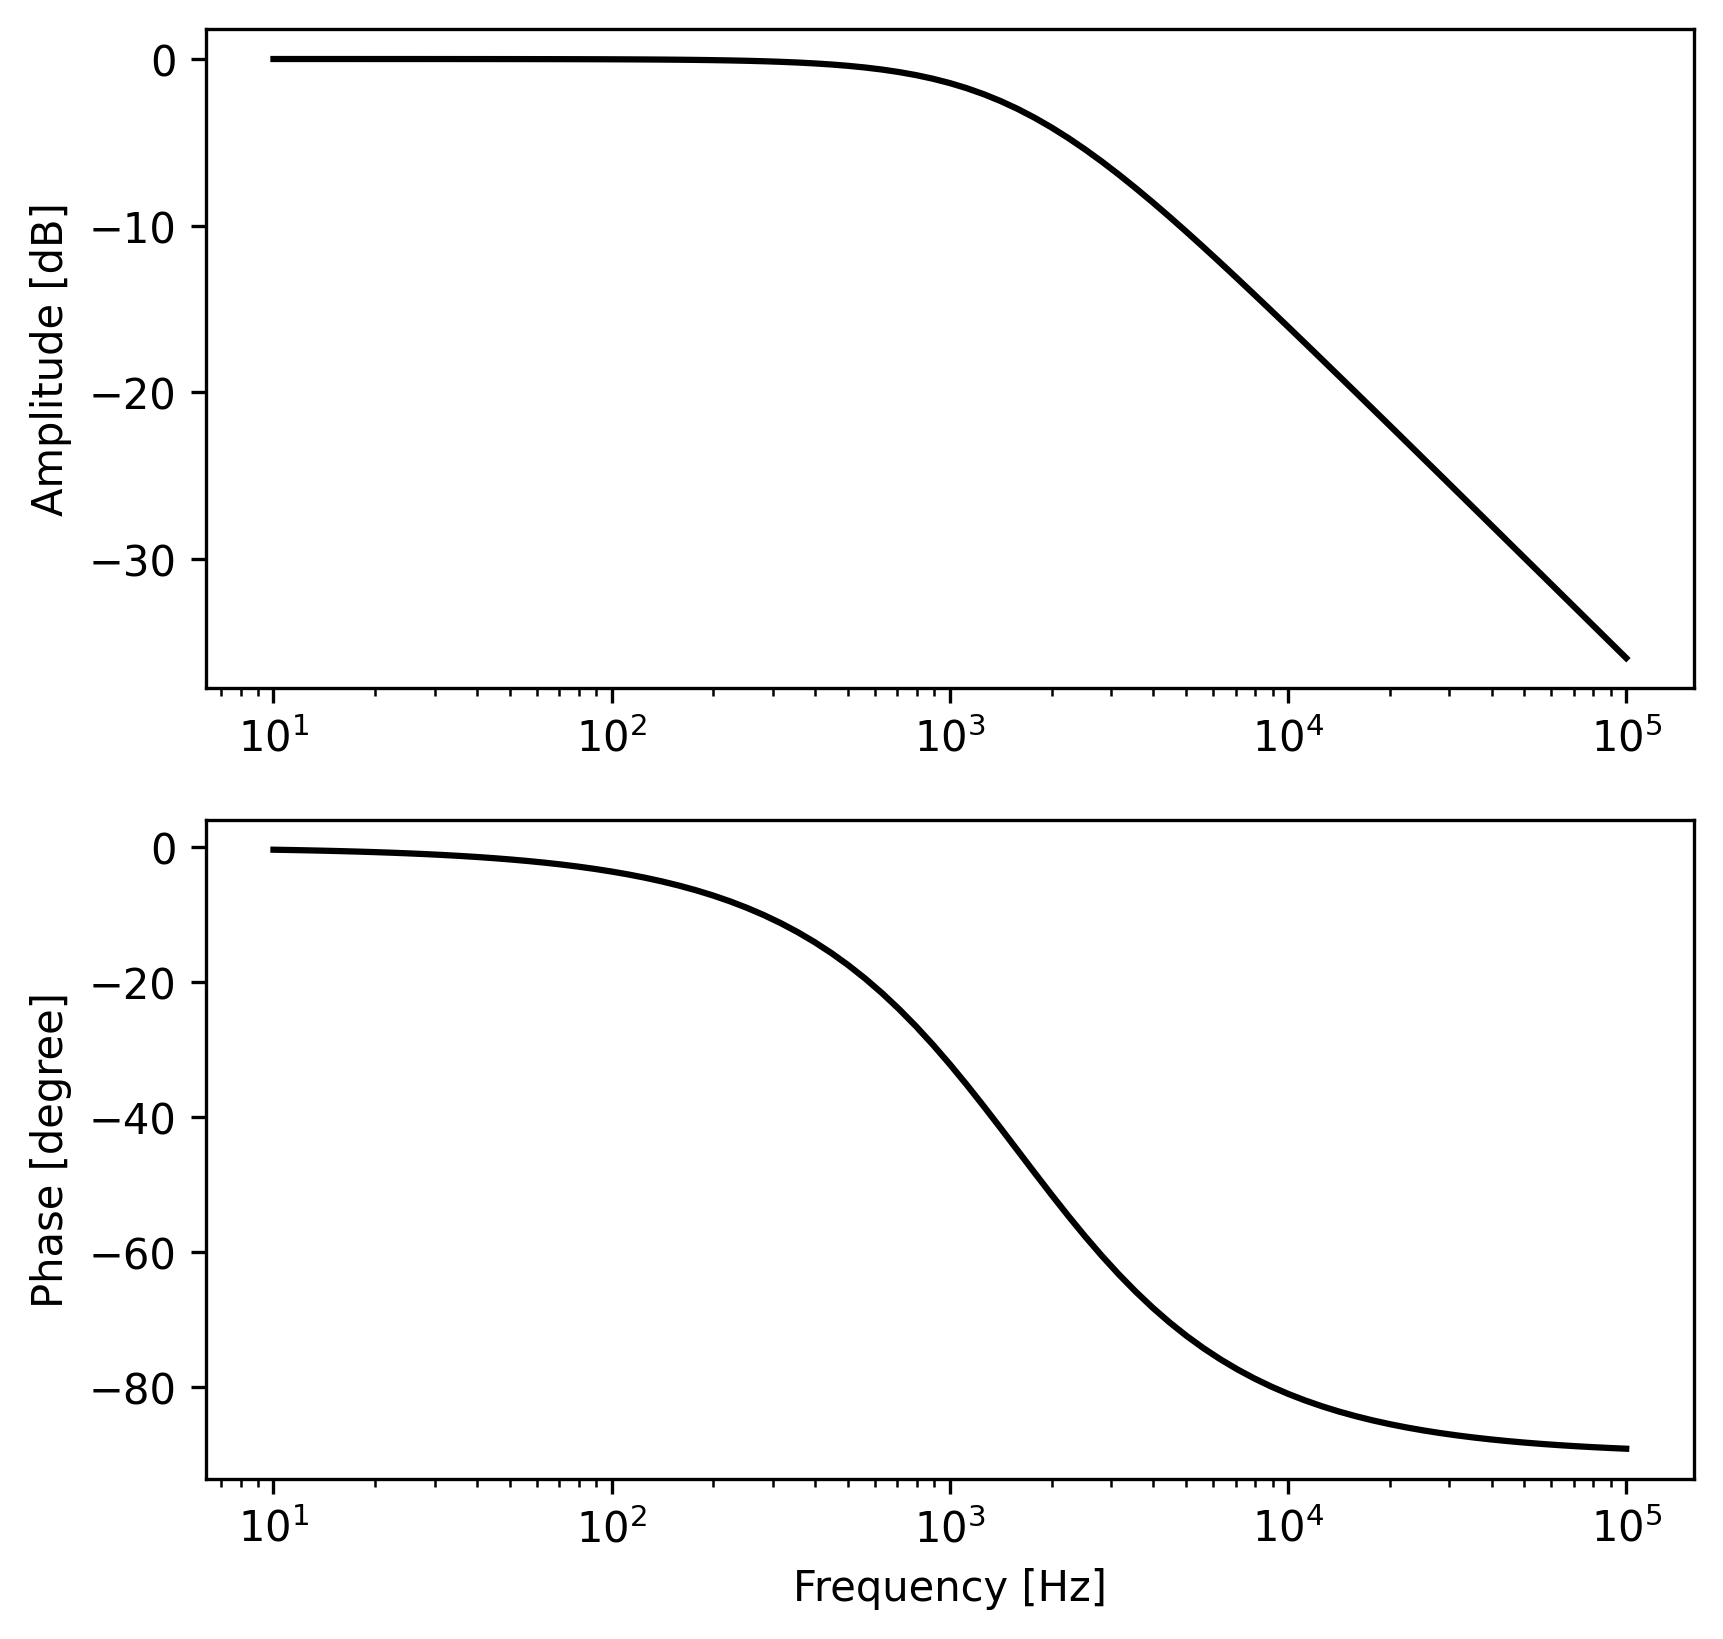

In [13]:
#周波数特性データのプロット

fig = plt.figure(figsize=(6.4,6.4), dpi=300)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

#振幅のプロット
ax1.plot(df['Freq'], df['Amp_dB'], color='black')
ax1.set_ylabel("Amplitude [dB]")
ax1.set_xscale("log")

#位相のプロット
ax2.plot(df['Freq'], df['Phase'], color='black')
ax2.set_xlabel("Frequency [Hz]")
ax2.set_ylabel("Phase [degree]")
ax2.set_xscale("log")

#グラフ画像保存
plt.savefig(filename + 'sim1.png')
plt.show()



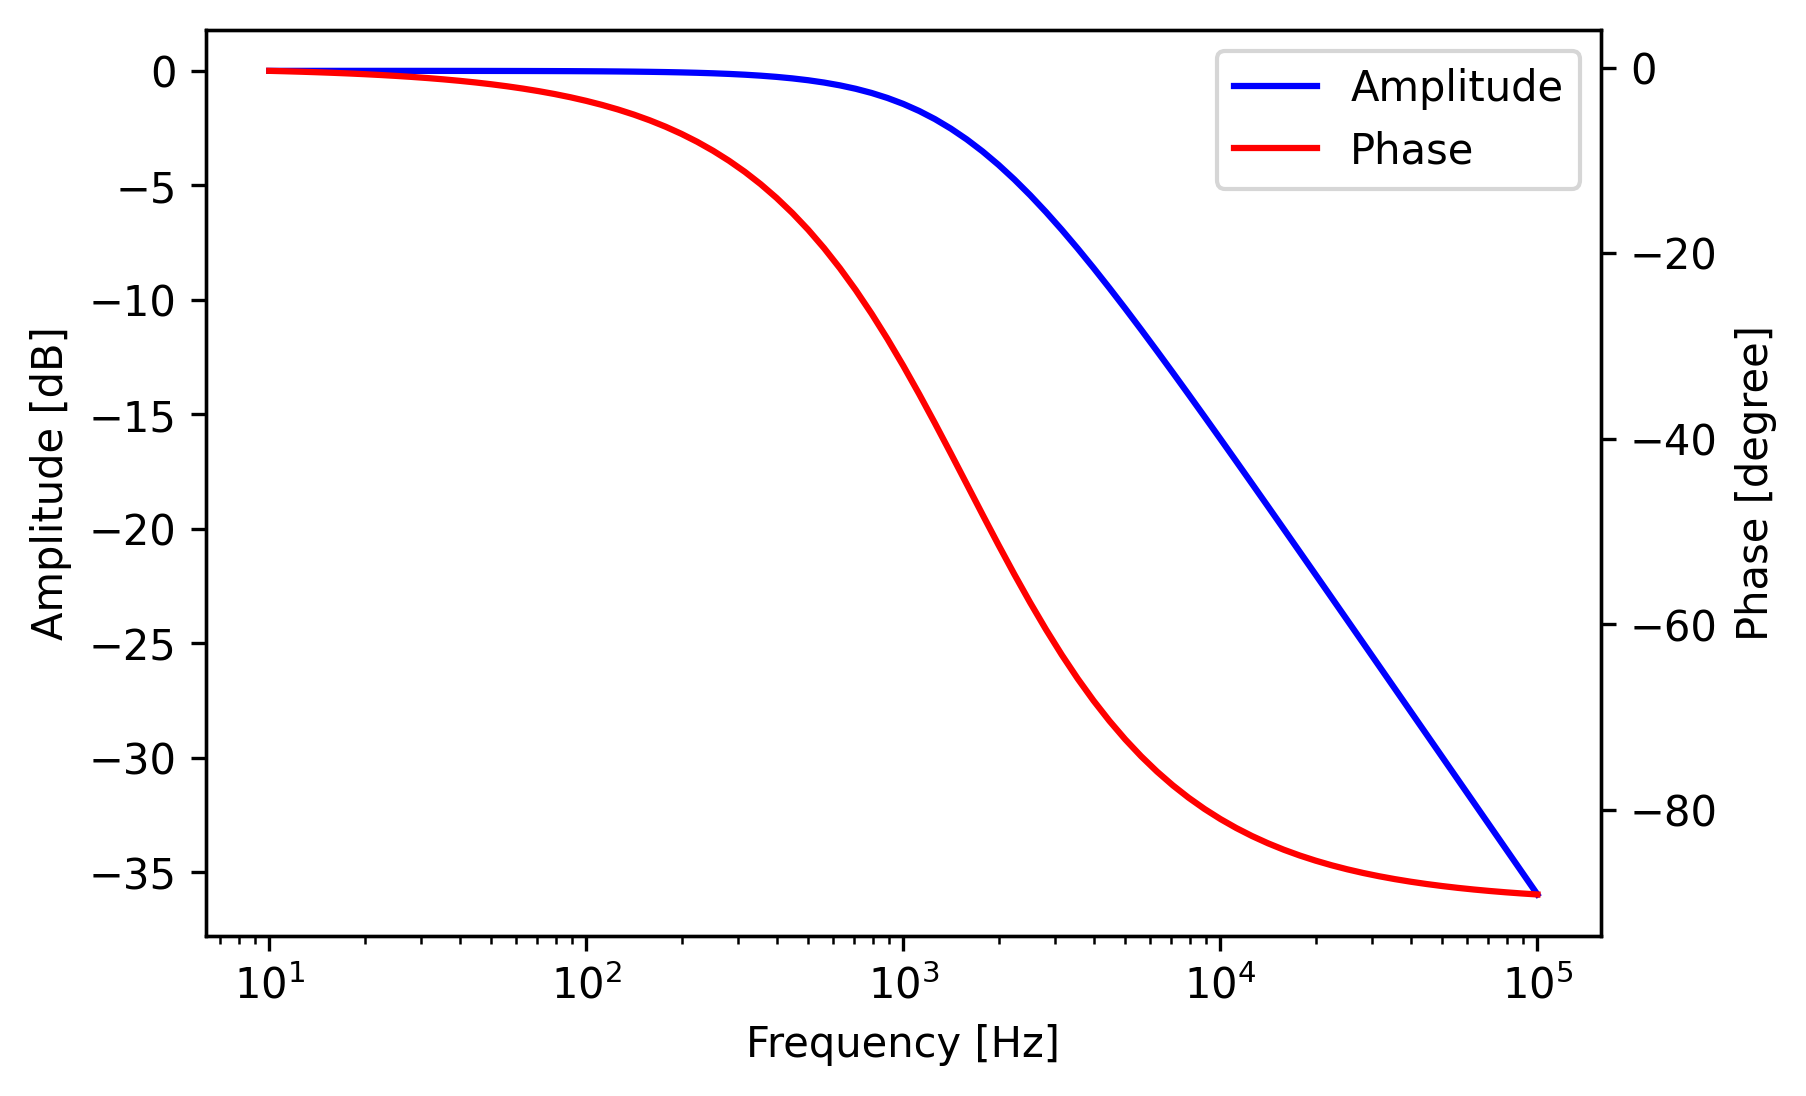

In [14]:
#周波数特性データのプロット（1つのグラフに描く場合。あまり一般的ではない）

fig = plt.figure(dpi=300)
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

#振幅のプロット
ax1.plot(df['Freq'], df['Amp_dB'], color="blue", label = 'Amplitude')
ax1.set_xlabel("Frequency [Hz]")
ax1.set_ylabel("Amplitude [dB]")

#位相のプロット
ax2.plot(df['Freq'], df['Phase'], color="red", label = 'Phase')
ax2.set_ylabel("Phase [degree]")
plt.xscale("log")

#凡例の表示
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

#グラフ画像保存
plt.savefig(filename + 'sim.png')
plt.show()


In [15]:
fc = 10000 / 2 / np.pi #カットオフ周波数1.6 kHz
df['s'] = 1j * df['Freq'] / fc
df['F'] = 1 / (1 + df['s'])
df['Amp_dB_theory'] = 20 * np.log10(np.absolute(df['F']))
df['Phase_theory'] = np.angle(df['F']) * 180 / np.pi

In [16]:
df

,Freq,Re,Im,Complex,Amp,Amp_dB,Phase,s,F,Amp_dB_theory,Phase_theory
0,10.000000,0.999961,-0.006283,0.999961-0.006283j,0.999980,-0.000171,-0.359995,0.000000+0.006283j,0.999961-0.006283j,-0.000171,-0.359995
1,11.220185,0.999950,-0.007049,0.999950-0.007049j,0.999975,-0.000216,-0.403920,0.000000+0.007050j,0.999950-0.007049j,-0.000216,-0.403920
2,12.589254,0.999937,-0.007910,0.999937-0.007910j,0.999969,-0.000272,-0.453204,0.000000+0.007910j,0.999937-0.007910j,-0.000272,-0.453204
3,14.125375,0.999921,-0.008875,0.999921-0.008875j,0.999961,-0.000342,-0.508500,0.000000+0.008875j,0.999921-0.008875j,-0.000342,-0.508500
4,15.848932,0.999901,-0.009957,0.999901-0.009957j,0.999950,-0.000431,-0.570543,0.000000+0.009958j,0.999901-0.009957j,-0.000431,-0.570543
...,...,...,...,...,...,...,...,...,...,...,...
76,63095.734448,0.000636,-0.025208,0.000636-0.025208j,0.025216,-31.966360,-88.555057,0.000000+39.644219j,0.000636-0.025208j,-31.966360,-88.555057
77,70794.578438,0.000505,-0.022470,0.000505-0.022470j,0.022476,-32.965792,-88.712137,0.000000+44.481546j,0.000505-0.022470j,-32.965792,-88.712137
78,79432.823472,0.000401,-0.020028,0.000401-0.020028j,0.020032,-33.965341,-88.852151,0.000000+49.909115j,0.000401-0.020028j,-33.965341,-88.852151
79,89125.093813,0.000319,-0.017852,0.000319-0.017852j,0.017855,-34.964982,-88.976951,0.000000+55.998948j,0.000319-0.017852j,-34.964982,-88.976951


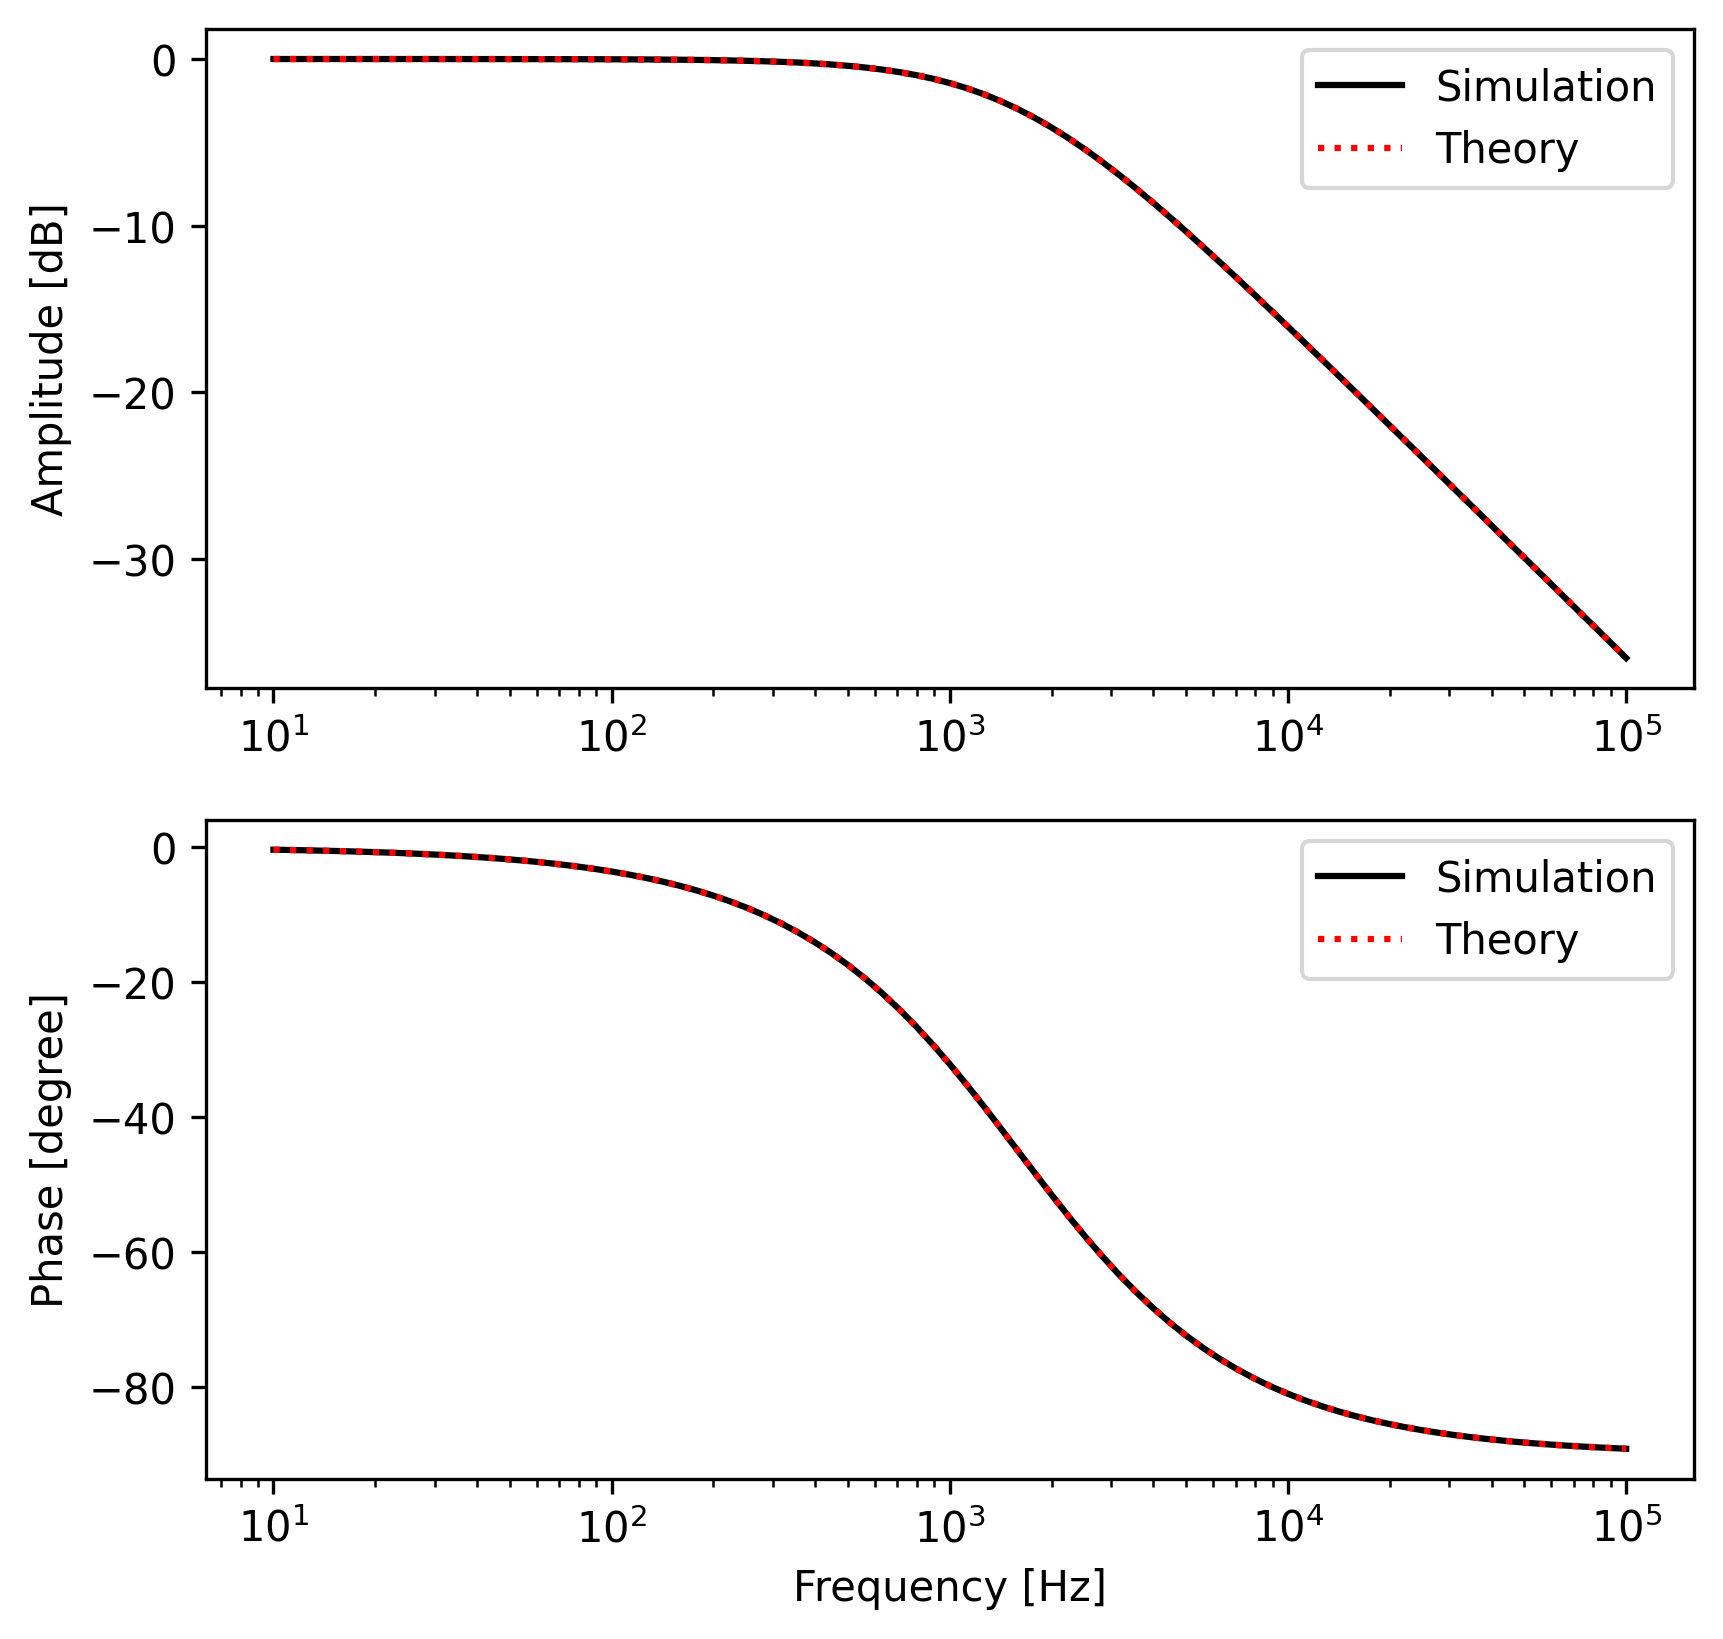

In [17]:
#シミュレーション特性と理論特性の一括表示（振幅と位相のグラフを縦に並べる場合）

#2つの軸を使うためのおまじない
fig = plt.figure(figsize=(6.4,6.4), dpi=300)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

#振幅のプロット
ax1.plot(df['Freq'], df['Amp_dB'], color= 'black', label = 'Simulation')
ax1.plot(df['Freq'], df['Amp_dB_theory'], color = 'red', linestyle = 'dotted', label = 'Theory')
ax1.set_xscale("log")
ax1.set_ylabel("Amplitude [dB]")
ax1.legend()

#位相のプロット
ax2.plot(df['Freq'], df['Phase'], color = 'black', label = 'Simulation')
ax2.plot(df['Freq'], df['Phase_theory'], color = 'red', linestyle = 'dotted', label = 'Theory')
ax2.set_xlabel("Frequency [Hz]")
ax2.set_ylabel("Phase [degree]")
ax2.set_xscale("log")
ax2.legend()

#画像の保存
plt.savefig(filename + '1.png')
plt.show()

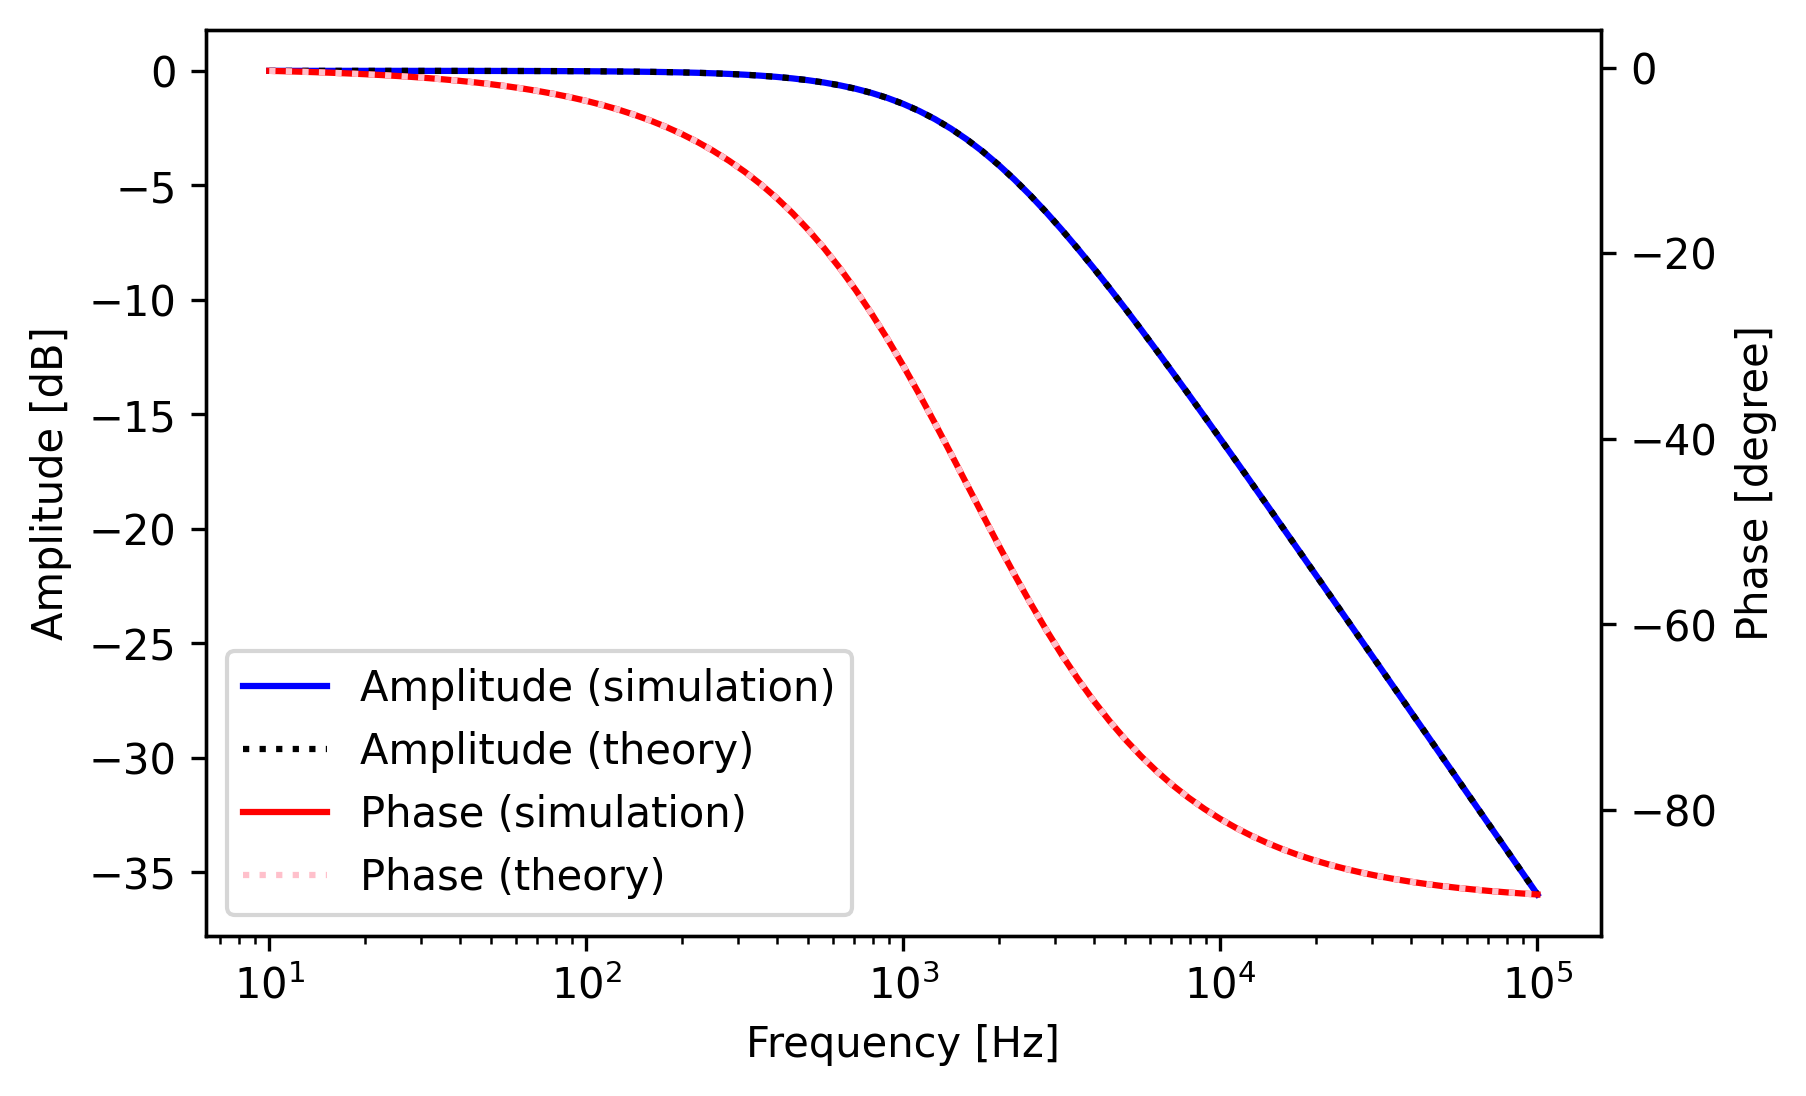

In [18]:
#シミュレーション特性と理論特性の一括表示（1つのグラフに描く場合。あまり一般的ではない）

#2つの軸を使うためのおまじない
fig = plt.figure(dpi=300)
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

#振幅のプロット
ax1.plot(df['Freq'], df['Amp_dB'], color= 'blue', label = 'Amplitude (simulation)')
ax1.plot(df['Freq'], df['Amp_dB_theory'], color = 'black', linestyle = 'dotted', label = 'Amplitude (theory)')
ax1.set_xlabel("Frequency [Hz]")
ax1.set_ylabel("Amplitude [dB]")

#位相のプロット
ax2.plot(df['Freq'], df['Phase'], color = 'red', label = 'Phase (simulation)')
ax2.plot(df['Freq'], df['Phase_theory'], color = 'pink', linestyle = 'dotted', label = 'Phase (theory)')
ax2.set_ylabel("Phase [degree]")
plt.xscale("log")

#凡例の表示
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

#画像の保存
plt.savefig(filename + '2.png')
plt.show()

In [19]:
#ステップ応答データの読み込み。1列目：時間、2列目：電圧。
filename = '02_lpf_step.txt'
df = pd.read_table(filename, names=('Time', 'Voltage'), skiprows=1)

In [20]:
df #データフレームの中身の確認

,Time,Voltage
0,0.000000,0.000000
1,0.001000,0.000000
2,0.001000,0.000046
3,0.001000,0.000090
4,0.001000,0.000228
...,...,...
110,0.001980,0.999945
111,0.001988,0.999949
112,0.001997,0.999953
113,0.001999,0.999954


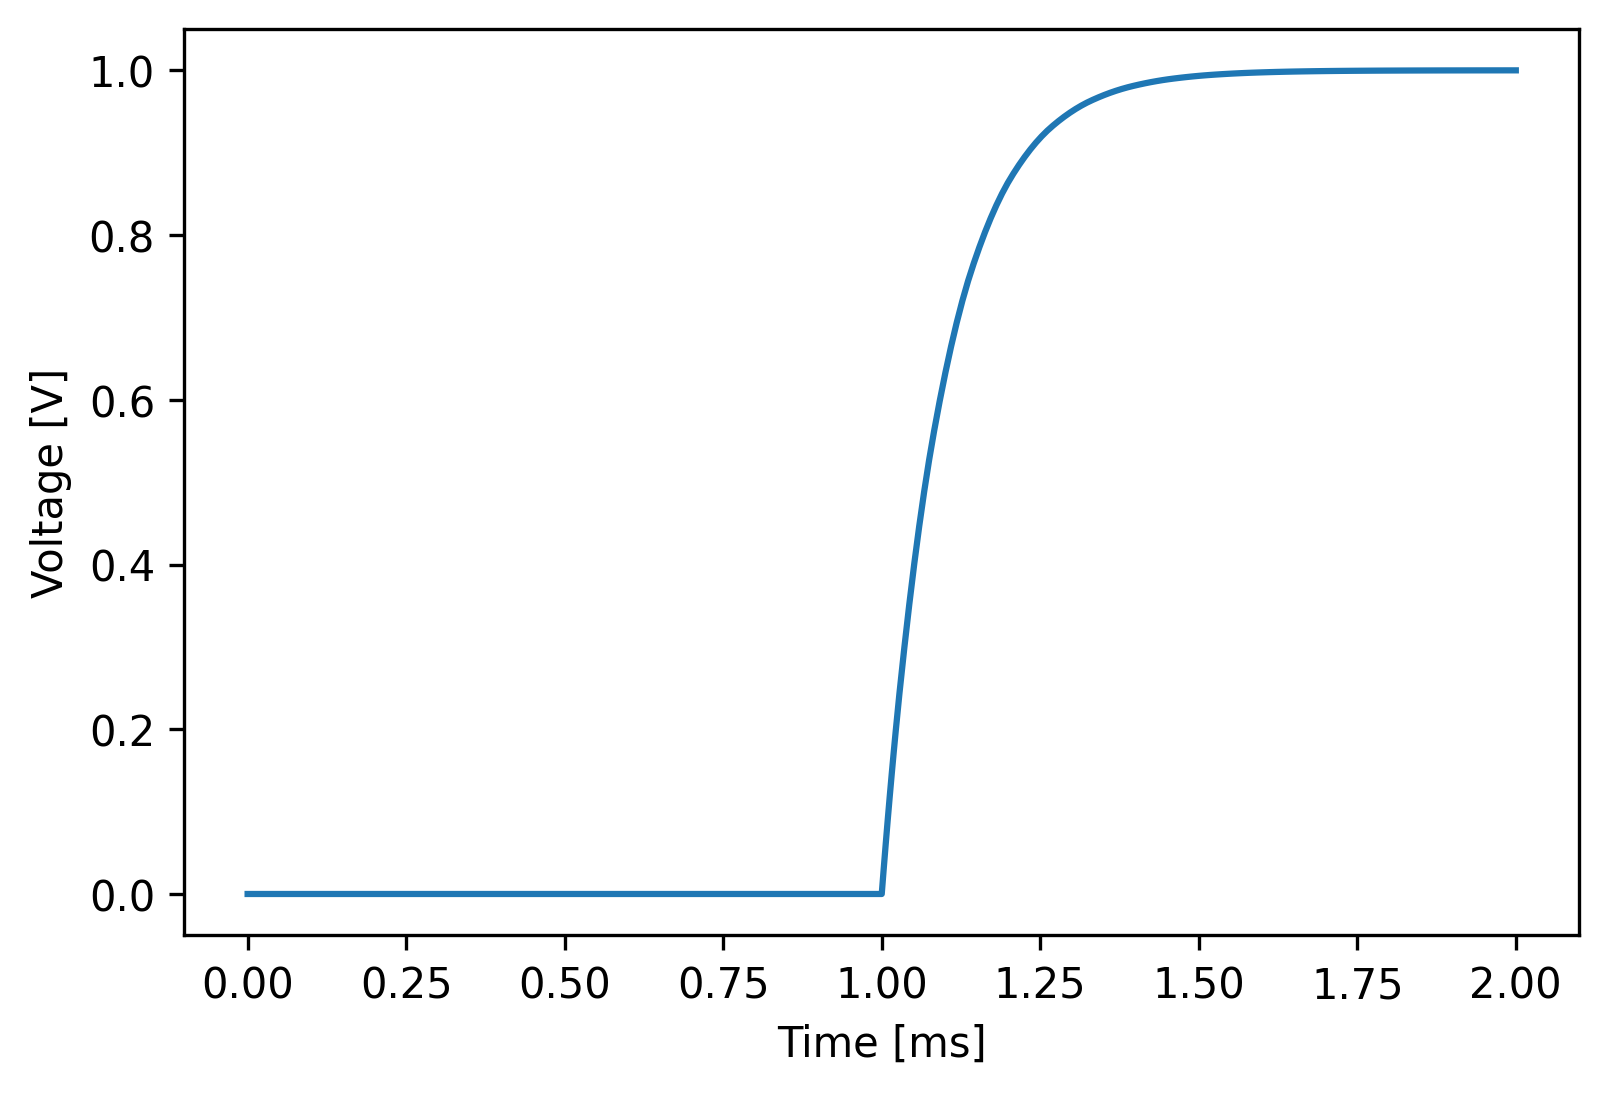

In [21]:
#ステップ応答のプロット

plt.figure(dpi = 300)
plt.xlabel('Time [ms]')
plt.ylabel('Voltage [V]')
plt.plot(df['Time'] / 0.001, df['Voltage']) #横軸をmsに変換
plt.savefig(filename + 'sim.png')
plt.show()

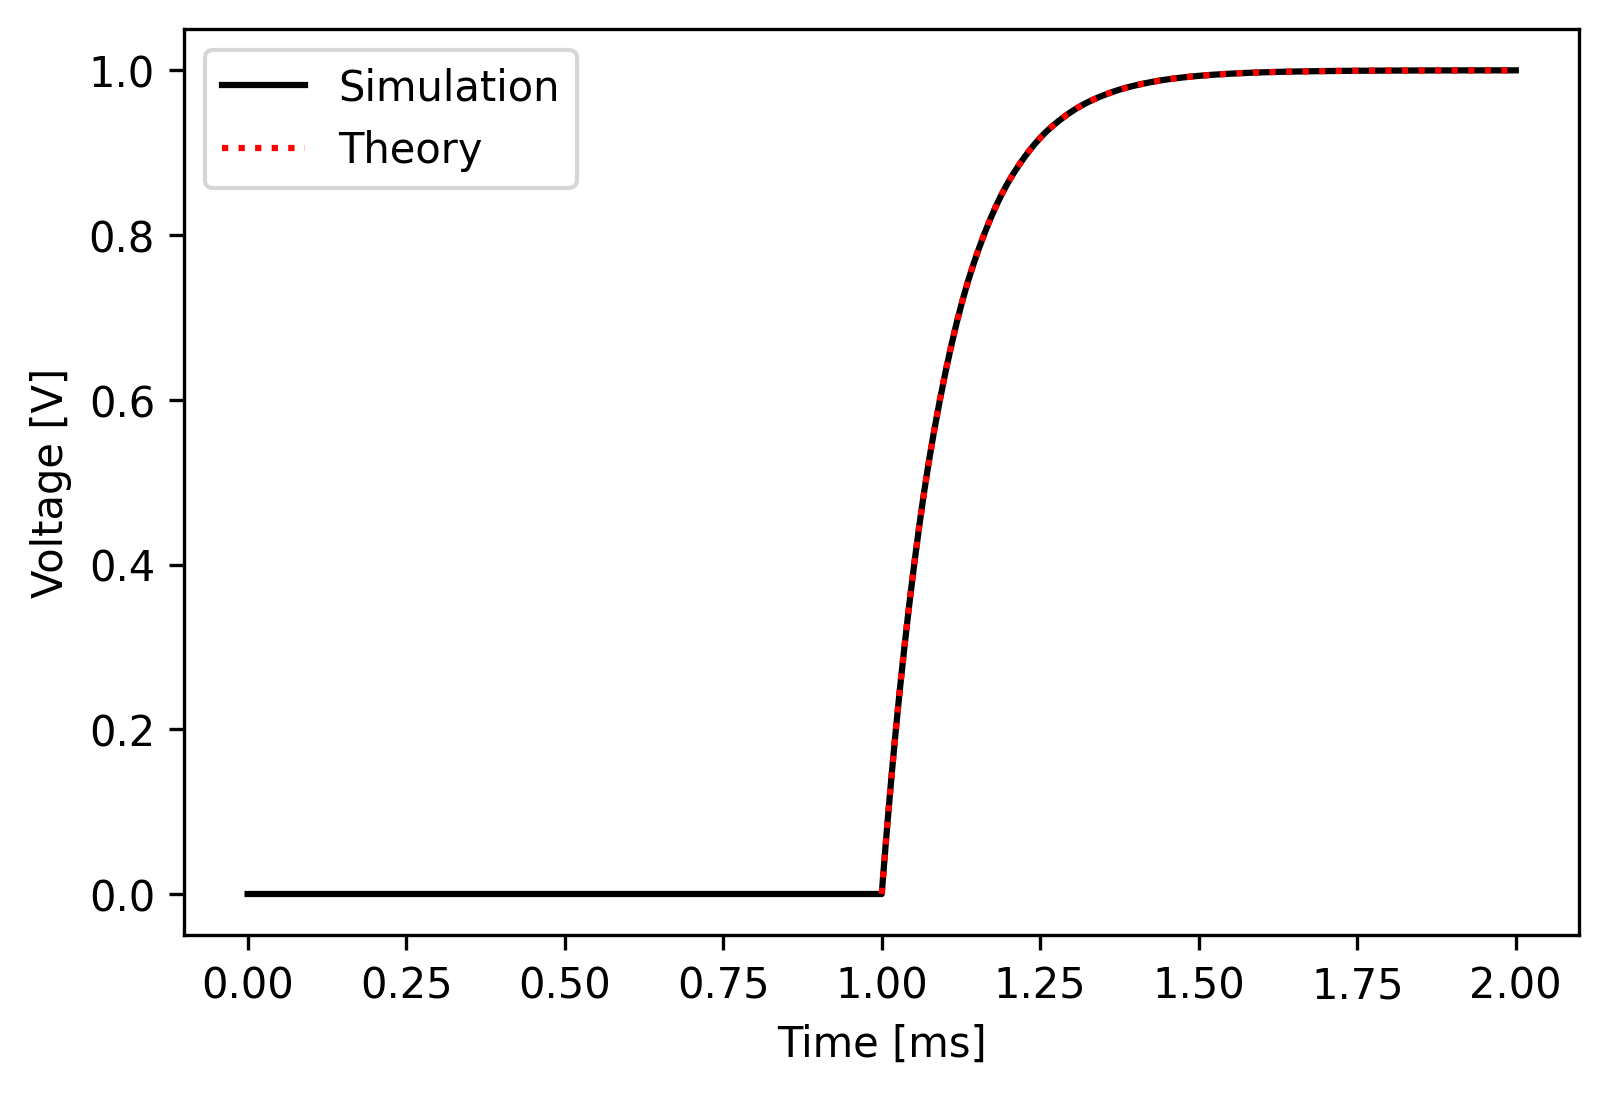

In [22]:
#シミュレーション特性と理論特性の一括表示

t = np.linspace(0, 0.001, 100) #時間配列を作成
v = 1.0-np.exp(-t/0.0001)    #LPFのステップ応答(時定数0.1 ms)

fig = plt.figure(dpi=300)
ax1 = fig.add_subplot(111)

ax1.set_xlabel('Time [ms]')
ax1.set_ylabel('Voltage [V]')
ax1.plot(df['Time']/0.001, df['Voltage'], color = 'black', label = 'Simulation')
ax1.plot(1 + t/0.001,v, color = 'red', label = 'Theory', linestyle = 'dotted')
ax1.legend()
plt.savefig(filename + '.png')
plt.show()